# Predicting the sale price of bulldozers sold at auctions using machine learning



## 1. Problem Definition

In a statement,
> Given parameters about bulldozers with their sale price (all sales was until April 30, 2012 ), can we predict bulldozers' price from May 1, 2012 - November 2012?
## 2. Data

The original data. https://www.kaggle.com/competitions/bluebook-for-bulldozers/data


## 3. Features

**Create data dictionary**

`SalesID`: the uniue identifier of the sale

`MachineID`: the unique identifier of a machine.  A machine can be sold multiple times

`saleprice`: what the machine sold for at auction (only provided in train.csv)

`saledate`: the date of the sale

## Preparing the tools 

We're gooing to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models from Scikit-Learn
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error


from joblib import dump, load


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Load data

In [31]:
df = pd.read_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\TrainAndValid.csv', encoding='windows-1251')
df.head()

C:\Users\konov\AppData\Local\Temp\ipykernel_18396\713414048.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\TrainAndValid.csv', encoding='windows-1251')


SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand         saledate fiModelDesc  \
0                      68.0       Low  11/16/2006 0:00        521D   
1                    4640.0       Low   3/26/2004 0:00      950FII   
2                    2838.0      High   2/26/2004 0:00         226   
3                    3486.0      High   5/19/2011 0:00    PC120-6E   
4                     722.0    Medium   7/23/2009 0:00        S175   

  fiBaseModel fiSecondaryDesc fiModelSeries fiModelDescriptor ProductSize  \
0         521               D           NaN               NaN         NaN   
1         950               F            II               NaN      Medium   
2         226             NaN           NaN               NaN         NaN   
3       PC120             NaN           -6E               NaN       Small   
4        S175             NaN           NaN               NaN         NaN   

                                  fiProductClassDesc           state  \
0           Wheel Loader - 110.0 to 120.0 Horsepower         Alabama   
1           Wheel Loader - 150.0 to 175.0 Horsepower  North Carolina   
2  Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...        New York   
3  Hydraulic Excavator, Track - 12.0 to 14.0 Metr...           Texas   
4  Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...        New York   

  ProductGroup    ProductGroupDesc Drive_System   Enclosure  \
0           WL        Wheel Loader          NaN  EROPS w AC   
1           WL        Wheel Loader          NaN  EROPS w AC   
2          SSL  Skid Steer Loaders          NaN       OROPS   
3          TEX    Track Excavators          NaN  EROPS w AC   
4          SSL  Skid Steer Loaders          NaN       EROPS   

                 Forks Pad_Type         Ride_Control Stick Transmission  \
0  None or Unspecified      NaN  None or Unspecified   NaN          NaN   
1  None or Unspecified      NaN  None or Unspecified   NaN          NaN   
2  None or Unspecified      NaN                  NaN   NaN          NaN   
3                  NaN      NaN                  NaN   NaN          NaN   
4  None or Unspecified      NaN                  NaN   NaN          NaN   

  Turbocharged Blade_Extension Blade_Width Enclosure_Type Engine_Horsepower  \
0          NaN             NaN         NaN            NaN               NaN   
1          NaN             NaN         NaN            NaN               NaN   
2          NaN             NaN         NaN            NaN               NaN   
3          NaN             NaN         NaN            NaN               NaN   
4          NaN             NaN         NaN            NaN               NaN   

  Hydraulics Pushblock Ripper Scarifier Tip_Control            Tire_Size  \
0    2 Valve       NaN    NaN       NaN         NaN  None or Unspecified   
1    2 Valve       NaN    NaN       NaN         NaN                 23.5   
2  Auxiliary       NaN    NaN       NaN         NaN                  NaN   
3    2 Valve       NaN    NaN       NaN         NaN                  NaN   
4  Auxiliary       NaN    NaN       NaN         NaN                  NaN   

               Coupler       Coupler_System       Grouser_Tracks  \
0  None or Unspecified                  NaN                  NaN   
1  None or Unspecified                  NaN                  NaN   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified                  NaN                  NaN   
4  None or Unspecified  None or Unspecified  None or Unspecified   

  Hydraulics_Flow Track_Type

In [3]:
df = pd.read_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\TrainAndValid.csv', encoding='windows-1251', parse_dates=['saledate'])
df.head()

C:\Users\konov\AppData\Local\Temp\ipykernel_20364\2935625269.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\TrainAndValid.csv', encoding='windows-1251', parse_dates=['saledate'])


SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc fiBaseModel  \
0                      68.0       Low 2006-11-16        521D         521   
1                    4640.0       Low 2004-03-26      950FII         950   
2                    2838.0      High 2004-02-26         226         226   
3                    3486.0      High 2011-05-19    PC120-6E       PC120   
4                     722.0    Medium 2009-07-23        S175        S175   

  fiSecondaryDesc fiModelSeries fiModelDescriptor ProductSize  \
0               D           NaN               NaN         NaN   
1               F            II               NaN      Medium   
2             NaN           NaN               NaN         NaN   
3             NaN           -6E               NaN       Small   
4             NaN           NaN               NaN         NaN   

                                  fiProductClassDesc           state  \
0           Wheel Loader - 110.0 to 120.0 Horsepower         Alabama   
1           Wheel Loader - 150.0 to 175.0 Horsepower  North Carolina   
2  Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...        New York   
3  Hydraulic Excavator, Track - 12.0 to 14.0 Metr...           Texas   
4  Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...        New York   

  ProductGroup    ProductGroupDesc Drive_System   Enclosure  \
0           WL        Wheel Loader          NaN  EROPS w AC   
1           WL        Wheel Loader          NaN  EROPS w AC   
2          SSL  Skid Steer Loaders          NaN       OROPS   
3          TEX    Track Excavators          NaN  EROPS w AC   
4          SSL  Skid Steer Loaders          NaN       EROPS   

                 Forks Pad_Type         Ride_Control Stick Transmission  \
0  None or Unspecified      NaN  None or Unspecified   NaN          NaN   
1  None or Unspecified      NaN  None or Unspecified   NaN          NaN   
2  None or Unspecified      NaN                  NaN   NaN          NaN   
3                  NaN      NaN                  NaN   NaN          NaN   
4  None or Unspecified      NaN                  NaN   NaN          NaN   

  Turbocharged Blade_Extension Blade_Width Enclosure_Type Engine_Horsepower  \
0          NaN             NaN         NaN            NaN               NaN   
1          NaN             NaN         NaN            NaN               NaN   
2          NaN             NaN         NaN            NaN               NaN   
3          NaN             NaN         NaN            NaN               NaN   
4          NaN             NaN         NaN            NaN               NaN   

  Hydraulics Pushblock Ripper Scarifier Tip_Control            Tire_Size  \
0    2 Valve       NaN    NaN       NaN         NaN  None or Unspecified   
1    2 Valve       NaN    NaN       NaN         NaN                 23.5   
2  Auxiliary       NaN    NaN       NaN         NaN                  NaN   
3    2 Valve       NaN    NaN       NaN         NaN                  NaN   
4  Auxiliary       NaN    NaN       NaN         NaN                  NaN   

               Coupler       Coupler_System       Grouser_Tracks  \
0  None or Unspecified                  NaN                  NaN   
1  None or Unspecified                  NaN                  NaN   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified                  NaN                  NaN   
4  None or Unspecified  None or Unspecified  None or Unspecified   

  Hydraulics_Flow Track_Type Undercarriage_Pad_Width Stick_Lengt

In [4]:
# Add columns of sale date
df["saleyear"] = df.saledate.dt.year
df["salemonth"] = df.saledate.dt.month
df["saleday"] = df.saledate.dt.day
df["saledayofyear"] = df.saledate.dt.dayofyear
df["saledayofweek"] = df.saledate.dt.dayofweek

df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc fiBaseModel  \
0                      68.0       Low 2006-11-16        521D         521   
1                    4640.0       Low 2004-03-26      950FII         950   
2                    2838.0      High 2004-02-26         226         226   
3                    3486.0      High 2011-05-19    PC120-6E       PC120   
4                     722.0    Medium 2009-07-23        S175        S175   

  fiSecondaryDesc fiModelSeries fiModelDescriptor ProductSize  \
0               D           NaN               NaN         NaN   
1               F            II               NaN      Medium   
2             NaN           NaN               NaN         NaN   
3             NaN           -6E               NaN       Small   
4             NaN           NaN               NaN         NaN   

                                  fiProductClassDesc           state  \
0           Wheel Loader - 110.0 to 120.0 Horsepower         Alabama   
1           Wheel Loader - 150.0 to 175.0 Horsepower  North Carolina   
2  Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...        New York   
3  Hydraulic Excavator, Track - 12.0 to 14.0 Metr...           Texas   
4  Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...        New York   

  ProductGroup    ProductGroupDesc Drive_System   Enclosure  \
0           WL        Wheel Loader          NaN  EROPS w AC   
1           WL        Wheel Loader          NaN  EROPS w AC   
2          SSL  Skid Steer Loaders          NaN       OROPS   
3          TEX    Track Excavators          NaN  EROPS w AC   
4          SSL  Skid Steer Loaders          NaN       EROPS   

                 Forks Pad_Type         Ride_Control Stick Transmission  \
0  None or Unspecified      NaN  None or Unspecified   NaN          NaN   
1  None or Unspecified      NaN  None or Unspecified   NaN          NaN   
2  None or Unspecified      NaN                  NaN   NaN          NaN   
3                  NaN      NaN                  NaN   NaN          NaN   
4  None or Unspecified      NaN                  NaN   NaN          NaN   

  Turbocharged Blade_Extension Blade_Width Enclosure_Type Engine_Horsepower  \
0          NaN             NaN         NaN            NaN               NaN   
1          NaN             NaN         NaN            NaN               NaN   
2          NaN             NaN         NaN            NaN               NaN   
3          NaN             NaN         NaN            NaN               NaN   
4          NaN             NaN         NaN            NaN               NaN   

  Hydraulics Pushblock Ripper Scarifier Tip_Control            Tire_Size  \
0    2 Valve       NaN    NaN       NaN         NaN  None or Unspecified   
1    2 Valve       NaN    NaN       NaN         NaN                 23.5   
2  Auxiliary       NaN    NaN       NaN         NaN                  NaN   
3    2 Valve       NaN    NaN       NaN         NaN                  NaN   
4  Auxiliary       NaN    NaN       NaN         NaN                  NaN   

               Coupler       Coupler_System       Grouser_Tracks  \
0  None or Unspecified                  NaN                  NaN   
1  None or Unspecified                  NaN                  NaN   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified                  NaN                  NaN   
4  None or Unspecified  None or Unspecified  None or Unspecified   

  Hydraulics_Flow Track_Type Undercarriage_Pad_Width Stick_Lengt

## Data Exploration (exploratory data analysis or EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [340]:
df.describe()

SalesID      SalePrice     MachineID        ModelID  \
count  4.126980e+05  412698.000000  4.126980e+05  412698.000000   
mean   2.011161e+06   31215.181414  1.230061e+06    6947.201828   
std    1.080068e+06   23141.743695  4.539533e+05    6280.824982   
min    1.139246e+06    4750.000000  0.000000e+00      28.000000   
25%    1.421898e+06   14500.000000  1.088593e+06    3261.000000   
50%    1.645852e+06   24000.000000  1.284397e+06    4605.000000   
75%    2.261012e+06   40000.000000  1.478079e+06    8899.000000   
max    6.333349e+06  142000.000000  2.486330e+06   37198.000000   

          datasource   auctioneerID       YearMade  MachineHoursCurrentMeter  \
count  412698.000000  392562.000000  412698.000000              1.475040e+05   
mean      135.169361       6.585268    1899.049637              3.522988e+03   
std         9.646749      17.158409     292.190243              2.716993e+04   
min       121.000000       0.000000    1000.000000              0.000000e+00   
25%       132.000000       1.000000    1985.000000              0.000000e+00   
50%       132.000000       2.000000    1995.000000              0.000000e+00   
75%       136.000000       4.000000    2001.000000              3.209000e+03   
max       173.000000      99.000000    2014.000000              2.483300e+06   

            saleyear      salemonth        saleday  saledayofyear  \
count  412698.000000  412698.000000  412698.000000  412698.000000   
mean     2004.317382       6.300268      16.152894     176.784094   
std         5.821090       3.437276       8.429510     103.910718   
min      1989.000000       1.000000       1.000000       1.000000   
25%      2000.000000       3.000000       9.000000      82.000000   
50%      2006.000000       6.000000      16.000000     165.000000   
75%      2009.000000       9.000000      23.000000     270.000000   
max      2012.000000      12.000000      31.000000     365.000000   

       saledayofweek  
count  412698.000000  
mean        2.594338  
std         1.417971  
min         0.000000  
25%         2.000000  
50%         3.000000  
75%         3.000000  
max         6.000000

In [6]:
#Are there any missing values?
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
# Remove columns with duplicate information 
df = df.drop(columns=['fiModelDesc', 'ProductGroupDesc'], axis=1)

In [58]:
df.groupby(['datasource']).count()

SalesID  SalePrice  MachineID  ModelID  auctioneerID  YearMade  \
datasource                                                                   
121           25191      25191      25191    25191         25191     25191   
132          260776     260776     260776   260776        260776    260776   
136           75491      75491      75491    75491         55355     75491   
149           33325      33325      33325    33325         33325     33325   
172           17914      17914      17914    17914         17914     17914   
173               1          1          1        1             1         1   

            MachineHoursCurrentMeter  UsageBand  saledate  fiModelDesc  \
datasource                                                               
121                            25185      22040     25191        25191   
132                            11182      11182    260776       260776   
136                            75482      15223     75491        75491   
149                            17741       9379     33325        33325   
172                            17913      15846     17914        17914   
173                                1          0         1            1   

            fiBaseModel  fiSecondaryDesc  fiModelSeries  fiModelDescriptor  \
datasource                                                                   
121               25191            16807           4004               6447   
132              260776           162535          34134              36221   
136               75491            56829          12600              19248   
149               33325            23425           5112               7202   
172               17914            12374           2816               5698   
173                   1                1              1                  0   

            ProductSize  fiProductClassDesc   state  ProductGroup  \
datasource                                                          
121               12536               25191   25191         25191   
132              123068              260776  260776        260776   
136               36395               75491   75491         75491   
149               13521               33325   33325         33325   
172               10572               17914   17914         17914   
173                   1                   1       1             1   

            ProductGroupDesc  Drive_System  Enclosure   Forks  Pad_Type  \
datasource                                                                
121                    25191          5482      25175   12282      3927   
132                   260776         69584     260542  124758     53518   
136                    75491         19783      75427   34625     14489   
149                    33325          8990      33316   18221      6581   
172                    17914          3248      17903    7829      2581   
173                        1             0          1       0         0   

            Ride_Control  Stick  Transmission  Turbocharged  Blade_Extension  \
datasource                                                                     
121                 8228   3927          9799          3927             1552   
132                97919  53518        120822         53518            16062   
136                28504  14489         35705         14489             5293   
149                12493   6581         15717          6581             2409   
172                 5584   2581          5963          2581              667   
173                    0      0             1             0                0   

            Blade_Width  Enclosure_Type  Engine_Horsepower  Hydraulics  \
datasource                                                               
121                1552            1552               1552       21212   
132               16062           16062              16062      206247   
136                5293            5293               5293       60766   
149 

### Explore all variables

In [262]:
df.datasource.value_counts()

132    260776
136     75491
149     33325
121     25191
172     17914
173         1
Name: datasource, dtype: int64

In [329]:
df.auctioneerID.value_counts()

1.0     192773
2.0      57441
3.0      30288
4.0      20877
99.0     12042
6.0      11950
7.0       7847
8.0       7419
5.0       7002
10.0      5876
9.0       4764
11.0      3823
12.0      3610
13.0      3068
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1807
15.0      1742
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       796
0.0        536
Name: auctioneerID, dtype: int64

In [266]:
df.Undercarriage_Pad_Width.value_counts()

None or Unspecified    82444
32 inch                 5287
28 inch                 3152
24 inch                 2998
20 inch                 2664
30 inch                 1602
36 inch                 1544
18 inch                 1439
34 inch                  540
16 inch                  481
31 inch                  191
27 inch                  144
22 inch                  135
26 inch                   98
33 inch                   94
14 inch                   51
15 inch                   33
25 inch                   17
31.5 inch                  2
Name: Undercarriage_Pad_Width, dtype: int64

In [6]:
df.UsageBand.value_counts()

Medium    35832
Low       25311
High      12527
Name: UsageBand, dtype: int64

In [267]:
df.Pattern_Changer.value_counts()

None or Unspecified    92924
Yes                     9269
No                        68
Name: Pattern_Changer, dtype: int64

In [270]:
df.YearMade.value_counts()

1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
1997    19269
2000    17238
1996    17001
1995    15806
2003    14661
1994    14471
2006    13426
2001    13385
2002    12473
1993    11181
1989    10785
1988    10546
1990    10379
1987    10191
1992     7711
1986     7588
1991     7461
1985     6547
1984     6174
1978     5693
1979     5613
2007     5048
1980     4744
1983     4603
1977     4425
1981     4190
1975     3240
1974     3113
1982     3048
1976     2718
1973     2547
1972     2141
1971     1720
2008     1691
1969     1544
1970     1321
1968     1260
1967     1104
1966      951
1965      675
1964      418
1963      250
2009      212
1962      145
1919      127
1961       99
1960       97
2010       58
2011       31
1959       28
1958       25
1956       20
1920       17
1957       16
1950        8
1953        7
1951        7
1952        6
1955        5
1954        3
1948        3
2014        2
1942        1
1937        1
1949        1
1947        1
2012  

In [275]:
df.Drive_System.value_counts()

Two Wheel Drive     47546
Four Wheel Drive    33551
No                  25166
All Wheel Drive       824
Name: Drive_System, dtype: int64

In [276]:
df.Enclosure.value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

In [277]:
df.Forks.value_counts()

None or Unspecified    183061
Yes                     14654
Name: Forks, dtype: int64

In [278]:
df.Pad_Type.value_counts()

None or Unspecified    72395
Reversible              5950
Street                  2725
Grouser                   26
Name: Pad_Type, dtype: int64

In [279]:
df.Ride_Control.value_counts()

No                     79389
None or Unspecified    64693
Yes                     8646
Name: Ride_Control, dtype: int64

In [280]:
df.Stick.value_counts()

Standard    49854
Extended    31242
Name: Stick, dtype: int64

In [281]:
df.Transmission.value_counts()

Standard               143915
None or Unspecified     23889
Powershift              11991
Powershuttle             4286
Hydrostatic              3342
Direct Drive              422
Autoshift                 118
AutoShift                  44
Name: Transmission, dtype: int64

In [282]:
df.Turbocharged.value_counts()

None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64

In [283]:
df.Blade_Extension.value_counts()

None or Unspecified    25406
Yes                      577
Name: Blade_Extension, dtype: int64

In [284]:
df.Blade_Width.value_counts()

14'                    9867
None or Unspecified    9521
12'                    5201
16'                     960
13'                     335
<12'                     99
Name: Blade_Width, dtype: int64

In [285]:
df.Enclosure_Type.value_counts()

None or Unspecified    22469
Low Profile             2675
High Profile             839
Name: Enclosure_Type, dtype: int64

In [286]:
df.Engine_Horsepower.value_counts()

No          24642
Variable     1341
Name: Engine_Horsepower, dtype: int64

In [287]:
df.Hydraulics.value_counts()

2 Valve                145317
Standard               106515
Auxiliary               43224
Base + 1 Function       25511
3 Valve                  5807
4 Valve                  3077
Base + 3 Function         311
Base + 2 Function         132
Base + 5 Function          94
Base + 4 Function          81
Base + 6 Function          54
None or Unspecified        10
Name: Hydraulics, dtype: int64

In [288]:
df.Pushblock.value_counts()

None or Unspecified    20017
Yes                     5966
Name: Pushblock, dtype: int64

In [289]:
df.Ripper.value_counts()

None or Unspecified    85405
Yes                     8185
Multi Shank             8071
Single Shank            5284
Name: Ripper, dtype: int64

In [290]:
df.Scarifier.value_counts()

None or Unspecified    13033
Yes                    12961
Name: Scarifier, dtype: int64

In [291]:
df.Tip_Control.value_counts()

None or Unspecified    16832
Sideshift & Tip         7164
Tip                     1987
Name: Tip_Control, dtype: int64

In [292]:
df.Tire_Size.value_counts()

None or Unspecified    47823
20.5                   15773
14"                     9111
23.5                    8760
26.5                    4635
17.5                    3971
29.5                    2767
17.5"                   1815
13"                      776
20.5"                    737
15.5                     610
15.5"                    463
23.5"                    309
7.0"                      56
23.1"                     20
10"                        9
10 inch                    3
Name: Tire_Size, dtype: int64

In [293]:
df.Coupler.value_counts()

None or Unspecified    190449
Manual                  23918
Hydraulic                6312
Name: Coupler, dtype: int64

In [294]:
df.Coupler_System.value_counts()

None or Unspecified    41727
Yes                     3247
Name: Coupler_System, dtype: int64

In [295]:
df.Grouser_Tracks.value_counts()

None or Unspecified    41820
Yes                     3055
Name: Grouser_Tracks, dtype: int64

In [296]:
df.Hydraulics_Flow.value_counts()

Standard               44251
High Flow                597
None or Unspecified       27
Name: Hydraulics_Flow, dtype: int64

In [297]:
df.Track_Type.value_counts()

Steel     87463
Rubber    14730
Name: Track_Type, dtype: int64

In [298]:
df.Undercarriage_Pad_Width.value_counts()

None or Unspecified    82444
32 inch                 5287
28 inch                 3152
24 inch                 2998
20 inch                 2664
30 inch                 1602
36 inch                 1544
18 inch                 1439
34 inch                  540
16 inch                  481
31 inch                  191
27 inch                  144
22 inch                  135
26 inch                   98
33 inch                   94
14 inch                   51
15 inch                   33
25 inch                   17
31.5 inch                  2
Name: Undercarriage_Pad_Width, dtype: int64

In [299]:
df.Stick_Length .value_counts()

None or Unspecified    81539
9' 6"                   5832
10' 6"                  3519
11' 0"                  1601
9' 10"                  1463
9' 8"                   1462
9' 7"                   1423
12' 10"                 1087
10' 2"                  1004
8' 6"                    908
8' 2"                    614
10' 10"                  414
12' 8"                   322
11' 10"                  307
8' 4"                    274
8' 10"                   104
12' 4"                   103
9' 5"                    101
15' 9"                    87
6' 3"                     51
13' 7"                    11
14' 1"                     7
13' 10"                    7
13' 9"                     7
19' 8"                     5
7' 10"                     3
15' 4"                     3
24' 3"                     2
9' 2"                      1
Name: Stick_Length, dtype: int64

In [300]:
df.Thumb.value_counts()

None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: Thumb, dtype: int64

In [301]:
df.Pattern_Changer.value_counts()

None or Unspecified    92924
Yes                     9269
No                        68
Name: Pattern_Changer, dtype: int64

In [302]:
df.Grouser_Type.value_counts()

Double    86998
Triple    15193
Single        2
Name: Grouser_Type, dtype: int64

In [303]:
df.Backhoe_Mounting.value_counts()

None or Unspecified    80692
Yes                       20
Name: Backhoe_Mounting, dtype: int64

In [304]:
df.Blade_Type.value_counts()

PAT                    39633
Straight               13461
None or Unspecified    11841
Semi U                  8907
VPAT                    3681
U                       1888
Angle                   1684
No                       743
Landfill                  26
Coal                      11
Name: Blade_Type, dtype: int64

In [305]:
df.Travel_Controls.value_counts()

None or Unspecified    71447
Differential Steer      5257
Finger Tip              2693
2 Pedal                 1144
Lever                    902
Pedal                    423
1 Speed                   11
Name: Travel_Controls, dtype: int64

In [306]:
df.Differential_Type.value_counts()

Standard        70169
Limited Slip     1181
No Spin           212
Locking             2
Name: Differential_Type, dtype: int64

In [307]:
df.Steering_Controls.value_counts()

Conventional           70774
Command Control          594
Four Wheel Standard      139
Wheel                     14
No                         1
Name: Steering_Controls, dtype: int64

In [309]:
df.fiProductClassDesc.value_counts()

Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth             57542
Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower                 18131
Wheel Loader - 150.0 to 175.0 Horsepower                            15537
Track Type Tractor, Dozer - 85.0 to 105.0 Horsepower                15161
Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons               13736
Track Type Tractor, Dozer - 130.0 to 160.0 Horsepower               11530
Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons               11527
Track Type Tractor, Dozer - 260.0 + Horsepower                      11227
Wheel Loader - 120.0 to 135.0 Horsepower                            10912
Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth             10847
Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity           9546
Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity           9296
Motorgrader - 145.0 to 170.0 Horsepower                              9071
Hydraulic Excavator, Track - 33.0 to 4

The variable `fiProductClassDesc` contains numerical information, extract it:

In [8]:
df_split = df.fiProductClassDesc.str.split(' - ', expand = True).values
df_split

array([['Wheel Loader', '110.0 to 120.0 Horsepower'],
       ['Wheel Loader', '150.0 to 175.0 Horsepower'],
       ['Skid Steer Loader', '1351.0 to 1601.0 Lb Operating Capacity'],
       ...,
       ['Hydraulic Excavator, Track', '2.0 to 3.0 Metric Tons'],
       ['Hydraulic Excavator, Track', '2.0 to 3.0 Metric Tons'],
       ['Hydraulic Excavator, Track', '3.0 to 4.0 Metric Tons']],
      dtype=object)

In [9]:
pattern = r'(\d+)\.0 to (\d+)\.0 ([\w\s]+)'
df_split = df['fiProductClassDesc'].str.extract(pattern, expand=True).values
df['fiProductClassDesc_lower'] = pd.to_numeric(df_split[:,0])
df['fiProductClassDesc_upper'] = pd.to_numeric(df_split[:,1])
del df['fiProductClassDesc']
df.filter(regex=('fiProductClassDesc*')).head()

fiProductClassDesc_lower  fiProductClassDesc_upper
0                     110.0                     120.0
1                     150.0                     175.0
2                    1351.0                    1601.0
3                      12.0                      14.0
4                    1601.0                    1751.0

`fiProductClassDesc_lower` and `fiProductClassDesc_upper` have empty rows, fill them with the mean value of each Product Group

In [10]:
Product_Group = ['WL', 'SSL', 'TEX', 'BL', 'TTT', 'MG']
for product in Product_Group:
    mean_lower_product = df.loc[(df['ProductGroup']== product),'fiProductClassDesc_lower'].mean()
    mean_upper_product = df.loc[(df['ProductGroup']== product),'fiProductClassDesc_upper'].mean()

    df.loc[(df['ProductGroup']== product),'fiProductClassDesc_lower'] = round(mean_lower_product)
    df.loc[(df['ProductGroup']== product),'fiProductClassDesc_upper'] = round(mean_upper_product)

In [16]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
state                            0
ProductGroup                     0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width                 386715
Enclosure_Type              386715
Engine_Horsepower   

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiBaseModel               412698 non-null  object        
 11  fiSecondaryDesc           271971 non-null  object        
 12  fi

### Visualize some variables 

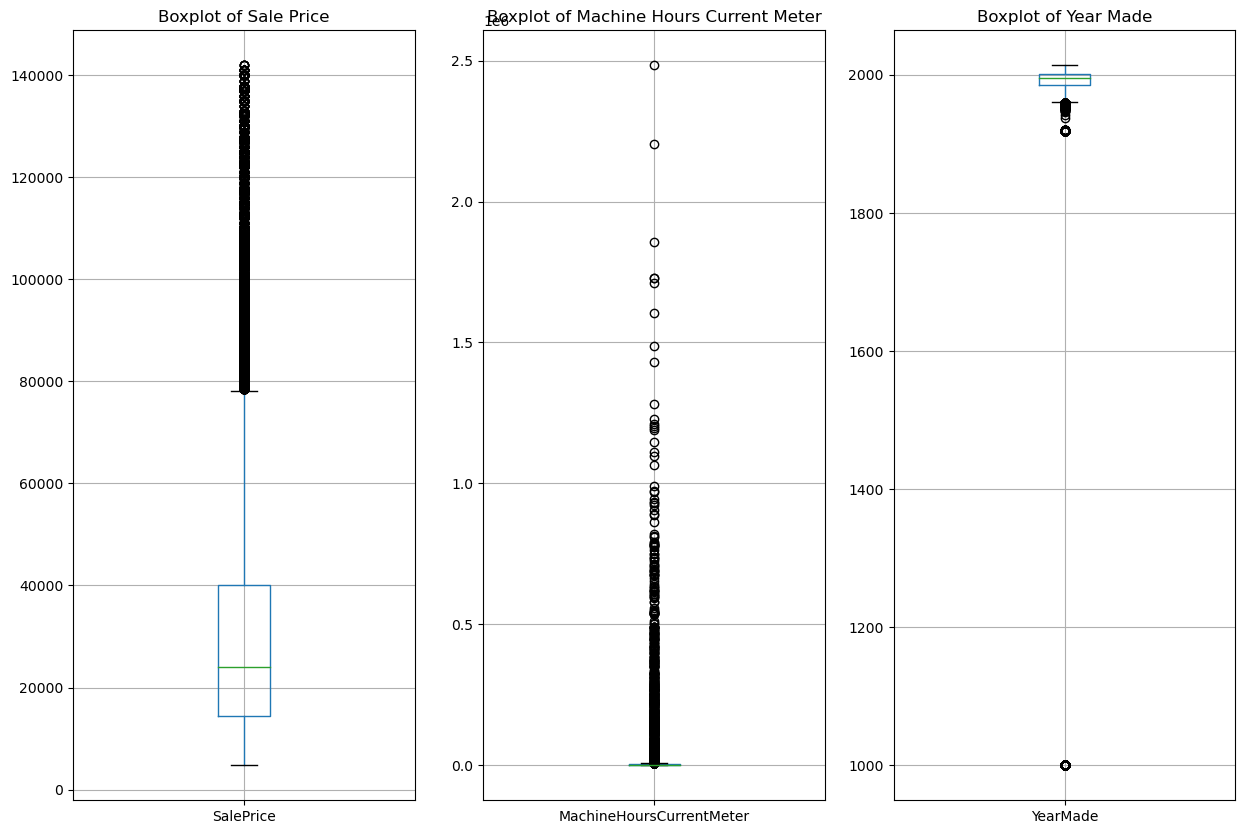

In [59]:
# Visualize the distribution of numerical variables 
fig, ax = plt.subplots(nrows=1,
                      ncols=3,
                      figsize=(15,10))
df.boxplot(column=['SalePrice'], ax=ax[0]);
ax[0].set(title ='Boxplot of Sale Price');

df.boxplot(column=['MachineHoursCurrentMeter'], ax=ax[1]);
ax[1].set(title ='Boxplot of Machine Hours Current Meter');

df.boxplot(column=['YearMade'], ax=ax[2]);
ax[2].set(title ='Boxplot of Year Made');

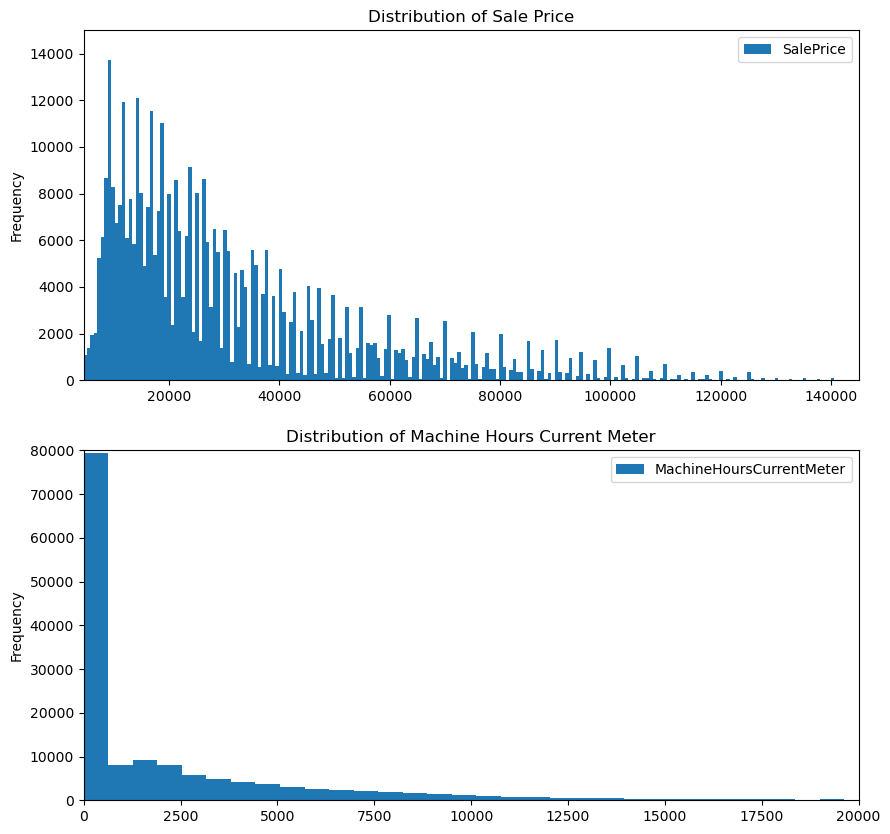

In [60]:
fig, ax = plt.subplots(nrows=2,
                      ncols=1,
                      figsize=(10,10))
               

df.plot.hist(bins=10000, column=['SalePrice'], ax=ax[0]);
ax[0].set(title ='Distribution of Sale Price',
         xlim=[4500,145000],
         ylim=[0,15000]);

df.plot.hist(bins=10000, column=['MachineHoursCurrentMeter'], ax=ax[1]);
ax[1].set(title ='Distribution of Machine Hours Current Meter',
         xlim=[0,20000],
         ylim=[0,80000]);

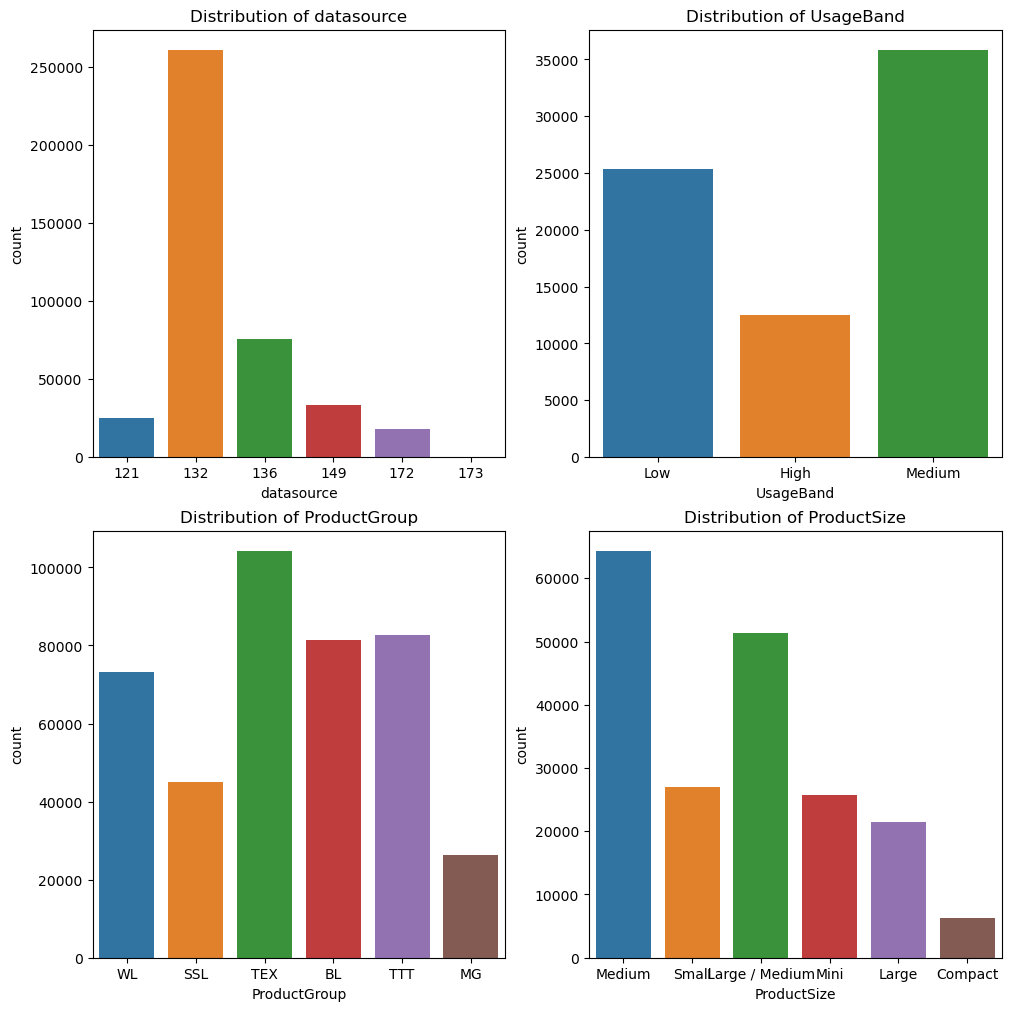

In [61]:
# Visualize the distribution of categorical variables 
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,10),
                      constrained_layout = True)


sns.countplot(x = df['datasource'],
              ax=ax[0,0]);
ax[0,0].set(title ='Distribution of datasource');

sns.countplot(x = df['UsageBand'],
             ax=ax[0,1]);
ax[0,1].set(title ='Distribution of UsageBand');

sns.countplot(x = df['ProductGroup'],
             ax=ax[1,0]);
ax[1,0].set(title ='Distribution of ProductGroup');

sns.countplot(x = df['ProductSize'],
             ax=ax[1,1]);
ax[1,1].set(title ='Distribution of ProductSize');

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


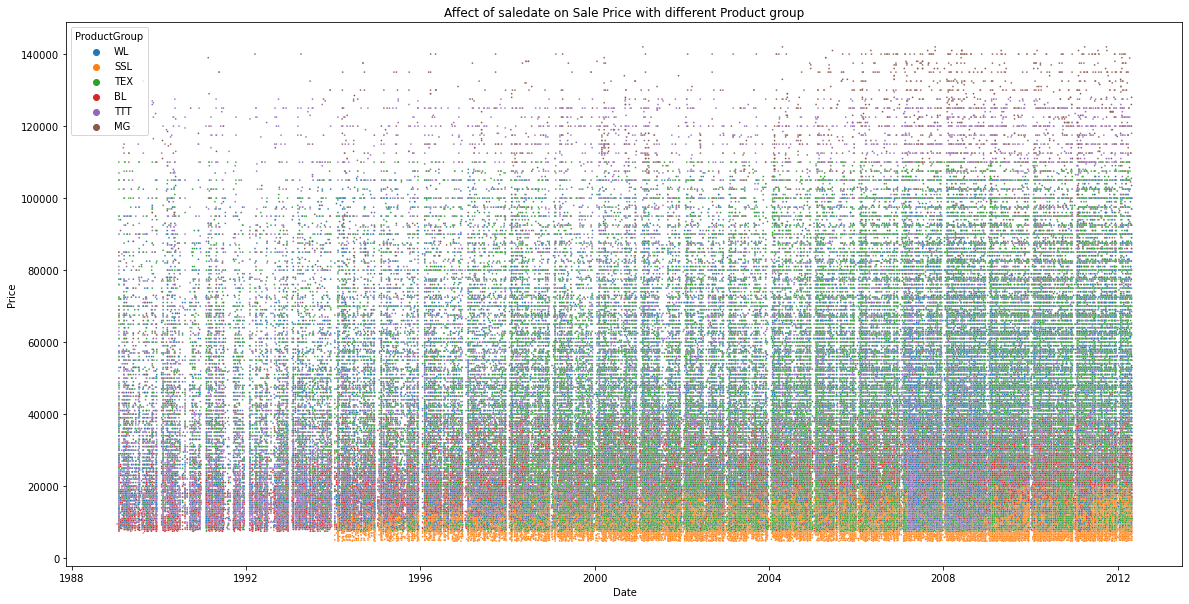

In [310]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x = df.saledate,
                y = df.SalePrice,
                s = 3,
                hue = df.ProductGroup,
                ax=ax)
ax.set(title ='Affect of saledate on Sale Price with different Product group',
       xlabel = 'Date',
       ylabel = 'Price');



C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


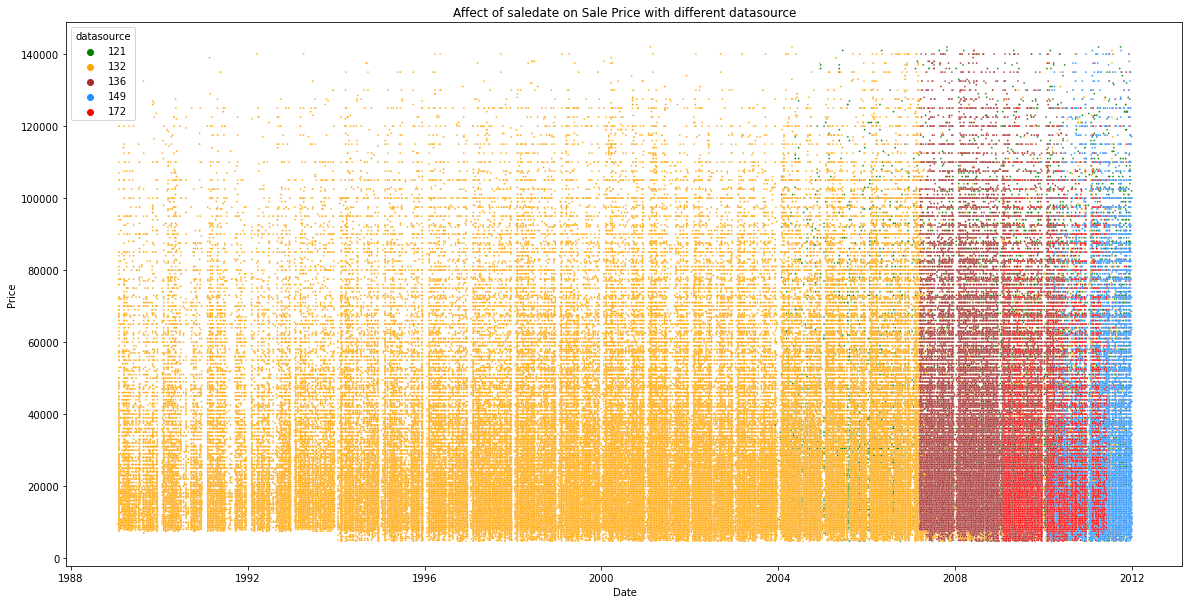

In [173]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x = df.saledate,
                y = df.SalePrice,
                s = 3,
                hue = df.datasource,
                ax=ax,
                palette=['green','orange','brown','dodgerblue','red'])
ax.set(title ='Affect of saledate on Sale Price with different datasource',
       xlabel = 'Date',
       ylabel = 'Price');

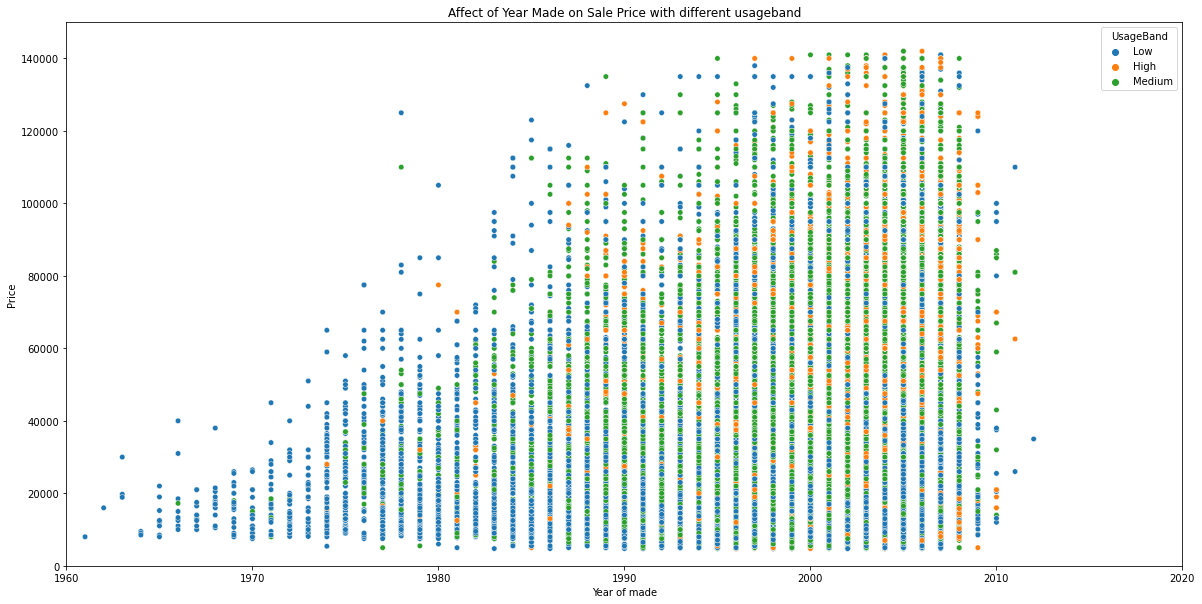

In [311]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x = df.YearMade,
                y = df.SalePrice,
                s = 30,
                hue = df.UsageBand,
                ax=ax,)
ax.set(title ='Affect of Year Made on Sale Price with different usageband',
       xlabel = 'Year of made',
       ylabel = 'Price',
       xlim=[1960,2020],
        ylim=[0,150000]);

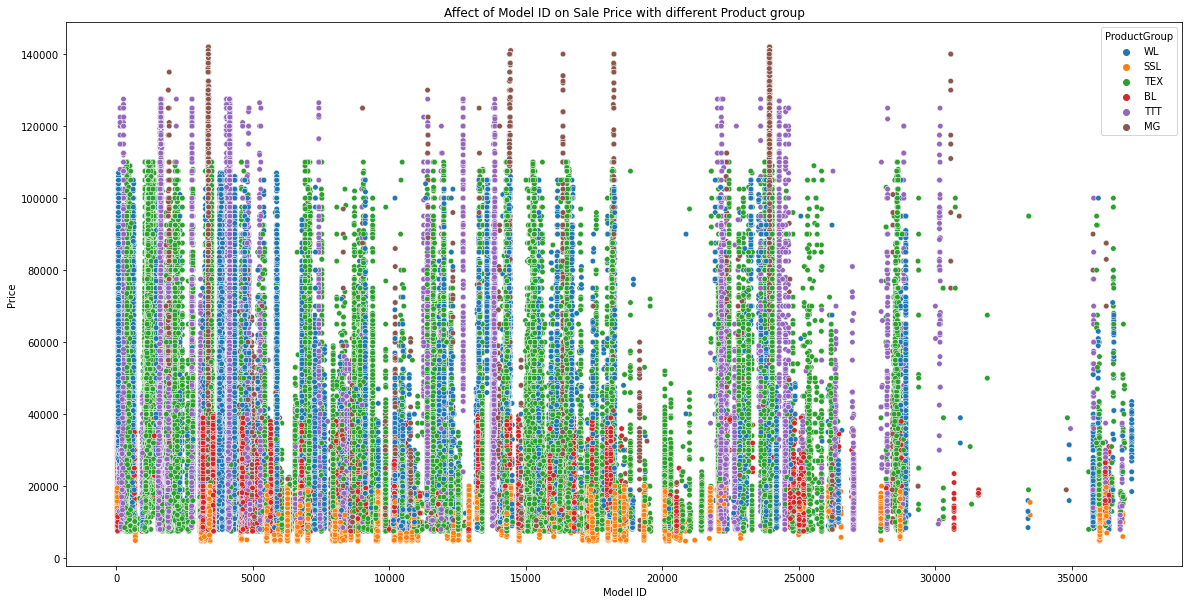

In [312]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x = df.ModelID,
                y = df.SalePrice,
                s = 30,
                hue = df.ProductGroup,
                ax=ax,)
ax.set(title ='Affect of Model ID on Sale Price with different Product group',
       xlabel = 'Model ID',
       ylabel = 'Price');

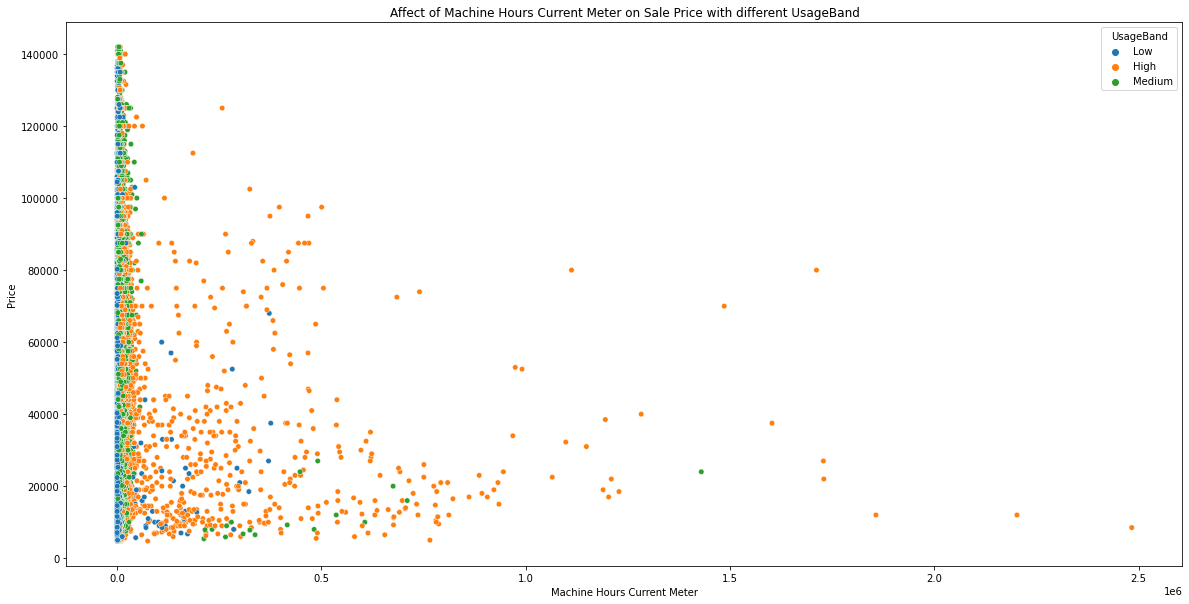

In [313]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x = df.MachineHoursCurrentMeter,
                y = df.SalePrice,
                s = 30,
                hue = df.UsageBand,
                ax=ax,)
ax.set(title ='Affect of Machine Hours Current Meter on Sale Price with different UsageBand',
       xlabel = 'Machine Hours Current Meter',
       ylabel = 'Price');

In [344]:
np.mean(df.MachineHoursCurrentMeter), df.MachineHoursCurrentMeter.median()

(3522.988285063456, 0.0)

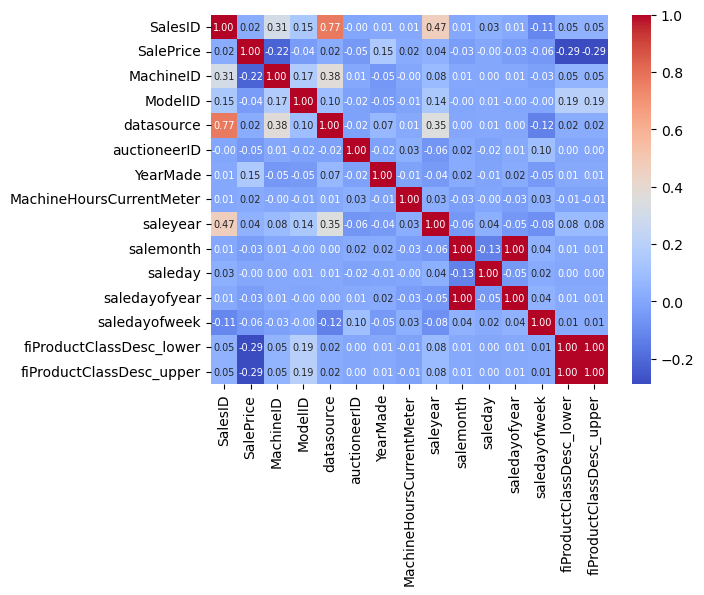

In [80]:
corr = df.corr()
#print(corr)

sns.heatmap(corr, annot=True, fmt= '.2f',annot_kws={'size': 7}, cmap= 'coolwarm')
plt.show()

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiBaseModel               412698 non-null  object        
 11  fiSecondaryDesc           271971 non-null  object        
 12  fi

### Check which numerical and categorical features have missing values and fill them

In [11]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():  
            print (label)

auctioneerID
MachineHoursCurrentMeter


In [12]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print (label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [13]:
# Fill missing values
# My opinion that in fact NaN means the same as 'None or Unspecified'. So I'll change NaN into 'None or Unspecified'

cat_imputer = SimpleImputer(strategy='constant', fill_value='None or Unspecified')
num_imputer = SimpleImputer(strategy='median')

cat_features = ['fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'UsageBand', 'ProductSize', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']
num_feature = ['auctioneerID', 'MachineHoursCurrentMeter']

imputer = ColumnTransformer([
    ('num_imputer', num_imputer, num_feature), 
    ('cat_imputer', cat_imputer, cat_features)
])

df_filled = imputer.fit_transform(df)

df_new = pd.DataFrame(df_filled,
                     columns = ['auctioneerID', 'MachineHoursCurrentMeter', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'UsageBand', 'ProductSize', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls'])


In [14]:
# Assign numeric values to ProductSize and UsageBand 
df_new['ProductSize'] = df_new['ProductSize'].map({'None or Unspecified':0, 'Mini':1, 'Small':2, 'Compact':3, 'Medium':4, 'Large / Medium':5, 'Large':6})
df_new['UsageBand'] = df_new['UsageBand'].map({'None or Unspecified':0, 'Low':1, 'Medium':2, 'High':3})

In [15]:
df_new['MachineHoursCurrentMeter'] = content.astype('float64')
df_new['auctioneerID'] = content.astype('float64')

In [16]:
# Add columns in df_new from df
df_new['YearMade'] = df['YearMade']
df_new['fiBaseModel'] = df['fiBaseModel']
df_new['saleyear'] = df['saleyear']
df_new['salemonth'] = df['salemonth']
df_new['ProductGroup'] = df['ProductGroup']
df_new["saleday"] = df["saleday"]
df_new["saledayofyear"] = df["saledayofyear"]
df_new["saledayofweek"] = df["saledayofweek"]
df_new["state"] = df["state"]
df_new['MachineID'] = df['MachineID']
df_new['ModelID'] = df['ModelID']
df_new['datasource'] = df['datasource']
df_new['fiProductClassDesc_lower'] = df['fiProductClassDesc_lower']
df_new['fiProductClassDesc_upper'] = df['fiProductClassDesc_upper']
df_new['SalePrice'] = df['SalePrice']

df_new.head()

auctioneerID  MachineHoursCurrentMeter      fiSecondaryDesc  \
0         188.0                     188.0                    D   
1         188.0                     188.0                    F   
2        1786.0                    1786.0  None or Unspecified   
3          22.0                      22.0  None or Unspecified   
4        1786.0                    1786.0  None or Unspecified   

         fiModelSeries    fiModelDescriptor  UsageBand  ProductSize  \
0  None or Unspecified  None or Unspecified          1            0   
1                   II  None or Unspecified          1            4   
2  None or Unspecified  None or Unspecified          3            0   
3                  -6E  None or Unspecified          3            2   
4  None or Unspecified  None or Unspecified          2            0   

          Drive_System   Enclosure                Forks             Pad_Type  \
0  None or Unspecified  EROPS w AC  None or Unspecified  None or Unspecified   
1  None or Unspecified  EROPS w AC  None or Unspecified  None or Unspecified   
2  None or Unspecified       OROPS  None or Unspecified  None or Unspecified   
3  None or Unspecified  EROPS w AC  None or Unspecified  None or Unspecified   
4  None or Unspecified       EROPS  None or Unspecified  None or Unspecified   

          Ride_Control                Stick         Transmission  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

          Turbocharged      Blade_Extension          Blade_Width  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

        Enclosure_Type    Engine_Horsepower Hydraulics            Pushblock  \
0  None or Unspecified  None or Unspecified    2 Valve  None or Unspecified   
1  None or Unspecified  None or Unspecified    2 Valve  None or Unspecified   
2  None or Unspecified  None or Unspecified  Auxiliary  None or Unspecified   
3  None or Unspecified  None or Unspecified    2 Valve  None or Unspecified   
4  None or Unspecified  None or Unspecified  Auxiliary  None or Unspecified   

                Ripper            Scarifier          Tip_Control  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

             Tire_Size              Coupler       Coupler_System  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1                 23.5  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

        Grouser_Tracks      Hydraulics_Flow           Track_Type  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified             Standard  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified             Standard  None or Unspecified   

  Undercarriage_Pad_Width         Stick_Length                Thumb  \
0     None or Unspecified  None or Unspecified  None or Unspecified   
1     None or Unspecified  None or U

Some features (`Transmission` and `Tire_Size`) are likely to have errors or inaccuracies. We need to fix it:

In [318]:
df.Transmission.value_counts()

Standard               143915
None or Unspecified     23889
Powershift              11991
Powershuttle             4286
Hydrostatic              3342
Direct Drive              422
Autoshift                 118
AutoShift                  44
Name: Transmission, dtype: int64

In [17]:
df_new.Tire_Size.value_counts()

None or Unspecified    362883
20.5                    15773
14"                      9111
23.5                     8760
26.5                     4635
17.5                     3971
29.5                     2767
17.5"                    1815
13"                       776
20.5"                     737
15.5                      610
15.5"                     463
23.5"                     309
7.0"                       56
23.1"                      20
10"                         9
10 inch                     3
Name: Tire_Size, dtype: int64

In [18]:
df_new.loc[df_new['Transmission']=='AutoShift', 'Transmission'] = 'Autoshift'

df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'] = df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'].str.replace('"', '')
df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'] = df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'].str.replace(' inch', '')

In [19]:
df_new.to_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\df_train_valid_obj.csv', encoding='windows-1251', index=False)

In [20]:
df_obj = pd.read_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\df_train_valid_obj.csv', encoding='windows-1251', index_col=False)
df_obj.head()

auctioneerID  MachineHoursCurrentMeter      fiSecondaryDesc  \
0         188.0                     188.0                    D   
1         188.0                     188.0                    F   
2        1786.0                    1786.0  None or Unspecified   
3          22.0                      22.0  None or Unspecified   
4        1786.0                    1786.0  None or Unspecified   

         fiModelSeries    fiModelDescriptor  UsageBand  ProductSize  \
0  None or Unspecified  None or Unspecified          1            0   
1                   II  None or Unspecified          1            4   
2  None or Unspecified  None or Unspecified          3            0   
3                  -6E  None or Unspecified          3            2   
4  None or Unspecified  None or Unspecified          2            0   

          Drive_System   Enclosure                Forks             Pad_Type  \
0  None or Unspecified  EROPS w AC  None or Unspecified  None or Unspecified   
1  None or Unspecified  EROPS w AC  None or Unspecified  None or Unspecified   
2  None or Unspecified       OROPS  None or Unspecified  None or Unspecified   
3  None or Unspecified  EROPS w AC  None or Unspecified  None or Unspecified   
4  None or Unspecified       EROPS  None or Unspecified  None or Unspecified   

          Ride_Control                Stick         Transmission  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

          Turbocharged      Blade_Extension          Blade_Width  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

        Enclosure_Type    Engine_Horsepower Hydraulics            Pushblock  \
0  None or Unspecified  None or Unspecified    2 Valve  None or Unspecified   
1  None or Unspecified  None or Unspecified    2 Valve  None or Unspecified   
2  None or Unspecified  None or Unspecified  Auxiliary  None or Unspecified   
3  None or Unspecified  None or Unspecified    2 Valve  None or Unspecified   
4  None or Unspecified  None or Unspecified  Auxiliary  None or Unspecified   

                Ripper            Scarifier          Tip_Control  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

             Tire_Size              Coupler       Coupler_System  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1                 23.5  None or Unspecified  None or Unspecified   
2  None or Unspecified  None or Unspecified  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified  None or Unspecified  None or Unspecified   

        Grouser_Tracks      Hydraulics_Flow           Track_Type  \
0  None or Unspecified  None or Unspecified  None or Unspecified   
1  None or Unspecified  None or Unspecified  None or Unspecified   
2  None or Unspecified             Standard  None or Unspecified   
3  None or Unspecified  None or Unspecified  None or Unspecified   
4  None or Unspecified             Standard  None or Unspecified   

  Undercarriage_Pad_Width         Stick_Length                Thumb  \
0     None or Unspecified  None or Unspecified  None or Unspecified   
1     None or Unspecified  None or U

### Turning data in the numbers

In [21]:
for label, content in df_new.items():
    if pd.api.types.is_string_dtype(content):
        df_new[label] = content.astype('category').cat.as_ordered()


In [22]:
for label, content in df_new.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_new[label] = pd.Categorical(content).codes+1

In [23]:
df_new.head()

auctioneerID  MachineHoursCurrentMeter  fiSecondaryDesc  fiModelSeries  \
0         188.0                     188.0               43            115   
1         188.0                     188.0               57            104   
2        1786.0                    1786.0              109            115   
3          22.0                      22.0              109             51   
4        1786.0                    1786.0              109            115   

   fiModelDescriptor  UsageBand  ProductSize  Drive_System  Enclosure  Forks  \
0                 93          1            0             4          3      1   
1                 93          1            4             4          3      1   
2                 93          3            0             4          6      1   
3                 93          3            2             4          3      1   
4                 93          2            0             4          1      1   

   Pad_Type  Ride_Control  Stick  Transmission  Turbocharged  Blade_Extension  \
0         2             2      2             4             1                1   
1         2             2      2             4             1                1   
2         2             2      2             4             1                1   
3         2             2      2             4             1                1   
4         2             2      2             4             1                1   

   Blade_Width  Enclosure_Type  Engine_Horsepower  Hydraulics  Pushblock  \
0            6               3                  2           1          1   
1            6               3                  2           1          1   
2            6               3                  2           4          1   
3            6               3                  2           1          1   
4            6               3                  2           4          1   

   Ripper  Scarifier  Tip_Control  Tire_Size  Coupler  Coupler_System  \
0       2          1            1         12        3               1   
1       2          1            1          8        3               1   
2       2          1            1         12        3               1   
3       2          1            1         12        3               1   
4       2          1            1         12        3               1   

   Grouser_Tracks  Hydraulics_Flow  Track_Type  Undercarriage_Pad_Width  \
0               1                2           1                       19   
1               1                2           1                       19   
2               1                3           1                       19   
3               1                2           1                       19   
4               1                3           1                       19   

   Stick_Length  Thumb  Pattern_Changer  Grouser_Type  Backhoe_Mounting  \
0            29      3                2             2                 1   
1            29      3                2             2                 1   
2            29      3                2             2                 1   
3            29      3                2             2                 1   
4            29      3                2             2                 1   

   Blade_Type  Travel_Controls  Differential_Type  Steering_Controls  \
0           5                6                  5                  2   
1           5                6                  5                  2   
2           5                6                  4                  5   
3           5                6                  4                  5   
4           5                6                  4                  5   

   YearMade  fiBaseModel  saleyear  salemonth  ProductGroup  saleday  \
0      2004          298      2006         11             6       16   
1      1996          529      2004          3             6       26   
2      2001          111      2004          2             3       26   
3      2001         1381      2011          5        

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   auctioneerID              412698 non-null  float64
 1   MachineHoursCurrentMeter  412698 non-null  float64
 2   fiSecondaryDesc           412698 non-null  int16  
 3   fiModelSeries             412698 non-null  int16  
 4   fiModelDescriptor         412698 non-null  int16  
 5   UsageBand                 412698 non-null  int64  
 6   ProductSize               412698 non-null  int64  
 7   Drive_System              412698 non-null  int8   
 8   Enclosure                 412698 non-null  int8   
 9   Forks                     412698 non-null  int8   
 10  Pad_Type                  412698 non-null  int8   
 11  Ride_Control              412698 non-null  int8   
 12  Stick                     412698 non-null  int8   
 13  Transmission              412698 non-null  i

In [25]:
df_new.to_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\df_train_valid.csv', encoding='windows-1251', index=False)

In [3]:
df_new = pd.read_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\df_train_valid.csv', encoding='windows-1251', index_col=False)
df_new.head()

auctioneerID  MachineHoursCurrentMeter  fiSecondaryDesc  fiModelSeries  \
0         188.0                     188.0               43            115   
1         188.0                     188.0               57            104   
2        1786.0                    1786.0              109            115   
3          22.0                      22.0              109             51   
4        1786.0                    1786.0              109            115   

   fiModelDescriptor  UsageBand  ProductSize  Drive_System  Enclosure  Forks  \
0                 93          1            0             4          3      1   
1                 93          1            4             4          3      1   
2                 93          3            0             4          6      1   
3                 93          3            2             4          3      1   
4                 93          2            0             4          1      1   

   Pad_Type  Ride_Control  Stick  Transmission  Turbocharged  Blade_Extension  \
0         2             2      2             4             1                1   
1         2             2      2             4             1                1   
2         2             2      2             4             1                1   
3         2             2      2             4             1                1   
4         2             2      2             4             1                1   

   Blade_Width  Enclosure_Type  Engine_Horsepower  Hydraulics  Pushblock  \
0            6               3                  2           1          1   
1            6               3                  2           1          1   
2            6               3                  2           4          1   
3            6               3                  2           1          1   
4            6               3                  2           4          1   

   Ripper  Scarifier  Tip_Control  Tire_Size  Coupler  Coupler_System  \
0       2          1            1         12        3               1   
1       2          1            1          8        3               1   
2       2          1            1         12        3               1   
3       2          1            1         12        3               1   
4       2          1            1         12        3               1   

   Grouser_Tracks  Hydraulics_Flow  Track_Type  Undercarriage_Pad_Width  \
0               1                2           1                       19   
1               1                2           1                       19   
2               1                3           1                       19   
3               1                2           1                       19   
4               1                3           1                       19   

   Stick_Length  Thumb  Pattern_Changer  Grouser_Type  Backhoe_Mounting  \
0            29      3                2             2                 1   
1            29      3                2             2                 1   
2            29      3                2             2                 1   
3            29      3                2             2                 1   
4            29      3                2             2                 1   

   Blade_Type  Travel_Controls  Differential_Type  Steering_Controls  \
0           5                6                  5                  2   
1           5                6                  5                  2   
2           5                6                  4                  5   
3           5                6                  4                  5   
4           5                6                  4                  5   

   YearMade  fiBaseModel  saleyear  salemonth  ProductGroup  saleday  \
0      2004          298      2006         11             6       16   
1      1996          529      2004          3             6       26   
2      2001          111      2004          2             3       26   
3      2001         1381      2011          5        

## 4. Modeling

In [4]:
# Split into train and valid
df_train = df_new[df_new.saleyear < 2012]
df_valid = df_new[df_new.saleyear >= 2012]

# Split into X and y
X_train = df_train.drop('SalePrice', axis=1)
X_valid = df_valid.drop('SalePrice', axis=1)
y_train = df_train.SalePrice
y_valid = df_valid.SalePrice

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
#df_train.shape, df_valid.shape

((401125, 54), (11573, 54), (401125,), (11573,))

In [5]:
def evaluate_model_preds(y_true_train, y_preds_train, y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a regrestion
    """
    R_squared_train = r2_score(y_true_train, y_preds_train)
    R_squared = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    rmsle = mean_squared_log_error(y_true, y_preds, squared=False)
    
    metric_dict = {'R_squared_train':round(R_squared_train, 2),
                    'R_squared_valid':round(R_squared, 2),
                   'mae':round(mae, 2),
                   'rmsle':round(rmsle,4)}
    
    print(f'R_squared_train: {R_squared_train*100:.2f}%')
    print(f'R_squared: {R_squared*100:.2f}%')
    print(f'MAE: {mae:.2f}')
    print(f'RMSLE: {rmsle:.4f}')
    
    return metric_dict

In [6]:
%%time
np.random.seed(42)
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_valid, y_valid)

Wall time: 4min 11s


0.8683981489993444

In [29]:
%%time
np.random.seed(42)
model_e_net = ElasticNet()

model_e_net.fit(X_train, y_train)
model_e_net.score(X_valid, y_valid)

Wall time: 11.1 s


C:\Users\konov\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+13, tolerance: 2.129e+10
  model = cd_fast.enet_coordinate_descent(


0.3714042827483083

In [30]:
%%time
np.random.seed(42)
model_ridge = Ridge()

model_ridge.fit(X_train, y_train)
model_ridge.score(X_valid, y_valid)

Wall time: 218 ms


0.44490884215066673

In [31]:
%%time
np.random.seed(42)
model_sgd = SGDRegressor()

model_sgd.fit(X_train, y_train)
model_sgd.score(X_valid, y_valid)

Wall time: 1min 23s


C:\Users\konov\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-1.0368738921120652e+31

## Hyperparameter tuning with RandomizedSearchCV and GridSearchCV

In [32]:
%%time

# Hyperparameter tuning SGDRegressor model
np.random.seed(42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train_sgd = scaler.transform(X_train)
X_valid_sgd = scaler.transform(X_valid)  # apply same transformation to test data


grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'max_iter': [1000], 
    'loss': ['squared_error'], 
    'penalty': ['elasticnet'],
    'l1_ratio': [0, 0.15, 0.5, 0.75, 1]
   }

gs_sgd_model = GridSearchCV(estimator = SGDRegressor(),
    param_grid = grid,
    n_jobs=-1,
    cv=3,
    verbose=2)
gs_sgd_model.fit(X_train_sgd, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Wall time: 5min 41s


GridSearchCV(cv=3, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'l1_ratio': [0, 0.15, 0.5, 0.75, 1],
                         'loss': ['squared_error'], 'max_iter': [1000],
                         'penalty': ['elasticnet']},
             verbose=2)

In [34]:
gs_sgd_model.best_params_

{'alpha': 100.0,
 'l1_ratio': 1,
 'loss': 'squared_error',
 'max_iter': 1000,
 'penalty': 'elasticnet'}

In [35]:
gs_sgd_model.score(X_valid_sgd, y_valid)

0.41438511258436017

In [40]:
%%time

# Hyperparameter tuning RandomForestRegressor model
np.random.seed(42)
grid = {'n_estimators': [60, 80, 100, 300, 500, 800, 1000], 
       'max_depth': [None, 5, 10, 15],
       'max_features': [None, 'sqrt'],
       'min_samples_split': [2, 3, 4, 5],
       'min_samples_leaf': [1, 2, 3, 4]} 

rs_model = RandomizedSearchCV(estimator = RandomForestRegressor(max_samples=30000),
    param_distributions = grid,
    n_iter=45,
    n_jobs=-1,
    cv=3,
    verbose=2)
rs_model.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Wall time: 15min 54s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(max_samples=30000),
                   n_iter=45, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [60, 80, 100, 300, 500,
                                                         800, 1000]},
                   verbose=2)

In [41]:
rs_model.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None}

In [42]:
rs_model.score(X_valid, y_valid)

0.8485152010604964

In [6]:
%%time
np.random.seed(42)
grid_gs = {'n_estimators': np.arange(450, 500, 10), 
       'max_depth': [None],
       'max_features': [None],
       'min_samples_split': [3],
       'min_samples_leaf': [2]} 

gs_model = GridSearchCV(estimator = RandomForestRegressor(max_samples=30000),
    param_grid = grid_gs,
    n_jobs=-1,
    cv=3,
    verbose=2)
gs_model.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Wall time: 5min 42s


GridSearchCV(cv=3, estimator=RandomForestRegressor(max_samples=30000),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [None],
                         'min_samples_leaf': [2], 'min_samples_split': [3],
                         'n_estimators': array([450, 460, 470, 480, 490])},
             verbose=2)

In [7]:
gs_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 460}

In [8]:
gs_model.score(X_valid, y_valid)

0.848670676637842

In [9]:
%%time

# Fit RandomForestRegressor model with the best parameters
np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1,
                              max_depth = None,
                              max_features = None,
                              min_samples_leaf = 2,
                              min_samples_split = 3,
                              n_estimators = 460)
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

Wall time: 1min 48s


0.8686495056493597

In [28]:
y_preds_train = model.predict(X_train)
y_preds = model.predict(X_valid)
evaluate_model_preds(y_train, y_preds_train, y_valid, y_preds)

R_squared_train: 97.82%
R_squared: 86.86%
MAE: 6185.84
RMSLE: 0.2540


{'R_squared_train': 0.98,
 'R_squared_valid': 0.87,
 'mae': 6185.84,
 'rmsle': 0.254}

In [11]:
# Save the model
dump(model, filename = 'random_forest_model.joblib')

['random_forest_model.joblib']

In [12]:
model = load(filename = 'random_forest_model.joblib')

## Feature Importance

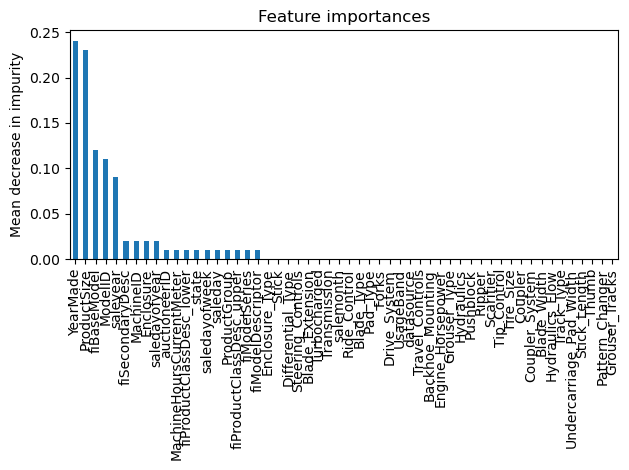

In [13]:
feature_names = list(X_train.columns.values)
importances = model.feature_importances_

forest_importances = pd.Series(importances.round(2), index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [16]:
forest_importances[0:19]

YearMade                    0.24
ProductSize                 0.23
fiBaseModel                 0.12
ModelID                     0.11
saleyear                    0.09
fiSecondaryDesc             0.02
MachineID                   0.02
Enclosure                   0.02
saledayofyear               0.02
auctioneerID                0.01
MachineHoursCurrentMeter    0.01
fiProductClassDesc_lower    0.01
state                       0.01
saledayofweek               0.01
saleday                     0.01
ProductGroup                0.01
fiProductClassDesc_upper    0.01
fiModelSeries               0.01
fiModelDescriptor           0.01
dtype: float64

## Predicting Sale Price on Test data

In [30]:
df_t = pd.read_csv(r'C:\Users\konov\studing\blue_for_bulldozer\data\Test.csv', encoding='windows-1251', parse_dates=['saledate'])
df_t.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc fiBaseModel  \
0                    3688.0       Low 2012-05-03        580G         580   
1                   28555.0      High 2012-05-10         936         936   
2                    6038.0    Medium 2012-05-10    EC210BLC       EC210   
3                    8940.0      High 2012-05-10       330CL         330   
4                    2286.0       Low 2012-05-10        650K         650   

  fiSecondaryDesc fiModelSeries fiModelDescriptor     ProductSize  \
0               G           NaN               NaN             NaN   
1             NaN           NaN               NaN          Medium   
2               B           NaN                LC  Large / Medium   
3               C           NaN                 L  Large / Medium   
4               K           NaN               NaN             NaN   

                                  fiProductClassDesc       state ProductGroup  \
0  Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...     Wyoming           BL   
1           Wheel Loader - 135.0 to 150.0 Horsepower    Virginia           WL   
2  Hydraulic Excavator, Track - 21.0 to 24.0 Metr...  New Jersey          TEX   
3  Hydraulic Excavator, Track - 33.0 to 40.0 Metr...  New Jersey          TEX   
4  Track Type Tractor, Dozer - 20.0 to 75.0 Horse...     Florida          TTT   

      ProductGroupDesc     Drive_System   Enclosure Forks  \
0      Backhoe Loaders  Two Wheel Drive       OROPS   Yes   
1         Wheel Loader              NaN       EROPS   Yes   
2     Track Excavators              NaN  EROPS w AC   NaN   
3     Track Excavators              NaN  EROPS w AC   NaN   
4  Track Type Tractors              NaN       OROPS   NaN   

              Pad_Type         Ride_Control     Stick Transmission  \
0  None or Unspecified                   No  Standard     Standard   
1                  NaN  None or Unspecified       NaN          NaN   
2                  NaN                  NaN       NaN          NaN   
3                  NaN                  NaN       NaN          NaN   
4                  NaN                  NaN       NaN  Hydrostatic   

          Turbocharged Blade_Extension Blade_Width Enclosure_Type  \
0  None or Unspecified             NaN         NaN            NaN   
1                  NaN             NaN         NaN            NaN   
2                  NaN             NaN         NaN            NaN   
3                  NaN             NaN         NaN            NaN   
4                  NaN             NaN         NaN            NaN   

  Engine_Horsepower Hydraulics Pushblock               Ripper Scarifier  \
0               NaN        NaN       NaN                  NaN       NaN   
1               NaN    2 Valve       NaN                  NaN       NaN   
2               NaN  Auxiliary       NaN                  NaN       NaN   
3               NaN   Standard       NaN                  NaN       NaN   
4               NaN    2 Valve       NaN  None or Unspecified       NaN   

  Tip_Control Tire_Size              Coupler Coupler_System Grouser_Tracks  \
0         NaN       NaN                  NaN            NaN            NaN   
1         NaN      20.5  None or Unspecified            NaN            NaN   
2         NaN       NaN  None or Unspecified            NaN            NaN   
3         NaN       NaN  None or Unspecified            NaN            NaN   
4         NaN       NaN                  NaN            NaN            NaN   

  Hydraulics_Flow Track_Type Undercarriage_Pad_Width         Stick_Length  \
0             NaN      

In [44]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [31]:
def filling_missing(df):
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["saledayofyear"] = df.saledate.dt.dayofyear
    df["saledayofweek"] = df.saledate.dt.dayofweek
    
    df = df.drop(columns=['fiModelDesc', 'ProductGroupDesc'], axis=1)
    
    df_split = df.fiProductClassDesc.str.split(' - ', expand = True).values
    pattern = r'(\d+)\.0 to (\d+)\.0 ([\w\s]+)'
    df_split = df['fiProductClassDesc'].str.extract(pattern, expand=True).values
    df['fiProductClassDesc_lower'] = pd.to_numeric(df_split[:,0])
    df['fiProductClassDesc_upper'] = pd.to_numeric(df_split[:,1])
    del df['fiProductClassDesc']
    df.filter(regex=('fiProductClassDesc*')).head()
    
    Product_Group = ['WL', 'SSL', 'TEX', 'BL', 'TTT', 'MG']
    for product in Product_Group:
        mean_lower_product = df.loc[(df['ProductGroup']== product),'fiProductClassDesc_lower'].mean()
        mean_upper_product = df.loc[(df['ProductGroup']== product),'fiProductClassDesc_upper'].mean()

        df.loc[(df['ProductGroup']== product),'fiProductClassDesc_lower'] = round(mean_lower_product)
        df.loc[(df['ProductGroup']== product),'fiProductClassDesc_upper'] = round(mean_upper_product)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():  
                print (label)
    
    # Fill missing values

    cat_imputer = SimpleImputer(strategy='constant', fill_value='None or Unspecified')
    num_imputer = SimpleImputer(strategy='median')

    cat_features = ['fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'UsageBand', 'ProductSize', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']
    num_feature = ['auctioneerID', 'MachineHoursCurrentMeter']

    imputer = ColumnTransformer([
        ('num_imputer', num_imputer, num_feature), 
        ('cat_imputer', cat_imputer, cat_features)
    ])

    df_filled = imputer.fit_transform(df)
    
    df_new = pd.DataFrame(df_filled,
                         columns = ['auctioneerID', 'MachineHoursCurrentMeter', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'UsageBand', 'ProductSize', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls'])
    
    df_new['ProductSize'] = df_new['ProductSize'].map({'None or Unspecified':0, 'Mini':1, 'Small':2, 'Compact':3, 'Medium':4, 'Large / Medium':5, 'Large':6})
    df_new['UsageBand'] = df_new['UsageBand'].map({'None or Unspecified':0, 'Low':1, 'Medium':2, 'High':3})
    
    df_new['MachineHoursCurrentMeter'] = content.astype('float64')
    df_new['auctioneerID'] = content.astype('float64')
    
    # Add columns in df_new from df
    df_new['YearMade'] = df['YearMade']
    df_new['fiBaseModel'] = df['fiBaseModel']
    df_new['saleyear'] = df['saleyear']
    df_new['salemonth'] = df['salemonth']
    df_new['ProductGroup'] = df['ProductGroup']
    df_new["saleday"] = df["saleday"]
    df_new["saledayofyear"] = df["saledayofyear"]
    df_new["saledayofweek"] = df["saledayofweek"]
    df_new["state"] = df["state"]
    df_new['MachineID'] = df['MachineID']
    df_new['datasource'] = df['datasource']
    df_new['ModelID'] = df['ModelID']
    df_new['fiProductClassDesc_lower'] = df['fiProductClassDesc_lower']
    df_new['fiProductClassDesc_upper'] = df['fiProductClassDesc_upper']
    
    
    df_new.loc[df_new['Transmission']=='AutoShift', 'Transmission'] = 'Autoshift'
    
    df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'] = df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'].str.replace('"', '')
    df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'] = df_new.loc[df_new['Tire_Size']!='None or Unspecified', 'Tire_Size'].str.replace(' inch', '')
    
    for label, content in df_new.items():
        if pd.api.types.is_string_dtype(content):
            df_new[label] = content.astype('category').cat.as_ordered()
    
    for label, content in df_new.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_new[label] = pd.Categorical(content).codes+1
        
    return df_new

In [32]:
X_test = filling_missing(df_t)

MachineHoursCurrentMeter


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   auctioneerID              12457 non-null  float64
 1   MachineHoursCurrentMeter  12457 non-null  float64
 2   fiSecondaryDesc           12457 non-null  int8   
 3   fiModelSeries             12457 non-null  int8   
 4   fiModelDescriptor         12457 non-null  int8   
 5   UsageBand                 12457 non-null  int64  
 6   ProductSize               12457 non-null  int64  
 7   Drive_System              12457 non-null  int8   
 8   Enclosure                 12457 non-null  int8   
 9   Forks                     12457 non-null  int8   
 10  Pad_Type                  12457 non-null  int8   
 11  Ride_Control              12457 non-null  int8   
 12  Stick                     12457 non-null  int8   
 13  Transmission              12457 non-null  int8   
 14  Turboc

In [34]:
pred = model.predict(X_test)
pred=np.rint(pred)
df_solution = pd.DataFrame()
df_solution['SalesID'] = df_t['SalesID'] 
df_solution['SalePrice']= pred


C:\Users\konov\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [35]:
df_solution.head()

SalesID  SalePrice
0  1227829    21337.0
1  1227844    35634.0
2  1227847    53980.0
3  1227848    86420.0
4  1227863    55406.0